## Decision Trees

In this notebook I am going to work through an example of classifier using <a href="https://en.wikipedia.org/wiki/Decision_Trees">decision trees</a>. Decision trees are easy to understand and follows. The plan for this exercise is to use the scikit learn module from Python in conjunction with the <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">Wisconsin breast cancer dataset</a> to create, train, test and evaluate a classifier using a decision tree, and also to visulaise the tree graphically.

<img src="img/decTree.png">

I will start by importing the required libraries for the project.

### Import

In [6]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
# import required sklearn modules
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection as mod
from sklearn.metrics import accuracy_score


### Dataset

For this example I'm going to use the breast cancer dataset

In [7]:
# load the dataset using the sklearn package - https://scikit-learn.org/stable/datasets/index.html
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

# create a dataframe with the data from the dataset
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
tar = pd.DataFrame(breast_cancer.target)
# add the median value to the dataframe
df["Diagnosis"] = breast_cancer.target

# show the head of the dataset
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Fit the model
Next we will use sklearn to fit a decision tree classification model. The steps for this are as follows:
1. Define the inputs and the outputs for the model.
1. Split the dataset into training data and testing data (I will use an 80/20 split for this)
1. Fit a model using the training data.
1. Use the model, and to predict tumour classifications for the test data.
1. Compare these to the actual result to see how accurate the model is.
1. Visualise the decsion that was used to make the predictions.

In [13]:
# define the inputs and outputs
outputs = df.iloc[:,-1]
inputs = df.iloc[:,:-1]

# split the data into testing and training data
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.2)

# fit a decision tree model using the training data
dtree = DecisionTreeClassifier()
dtree.fit(inputs_train,outputs_train)

# make a prediction
test_predict = dtree.predict(inputs_test) 

# compare the predictions with the actual result
score =accuracy_score(outputs_test,test_predict)
print("The accuracy of this decision tree model is: ", round(score,2))

The accuracy of this decision tree model is:  0.84


The accuracy score of this decision tree model is 84%, lower than the 95% achieved using Logistic Regression as a classifier on this same data set.

## Visualising the Model

In the final section we will visualise the model using the `pydotplus` package. 

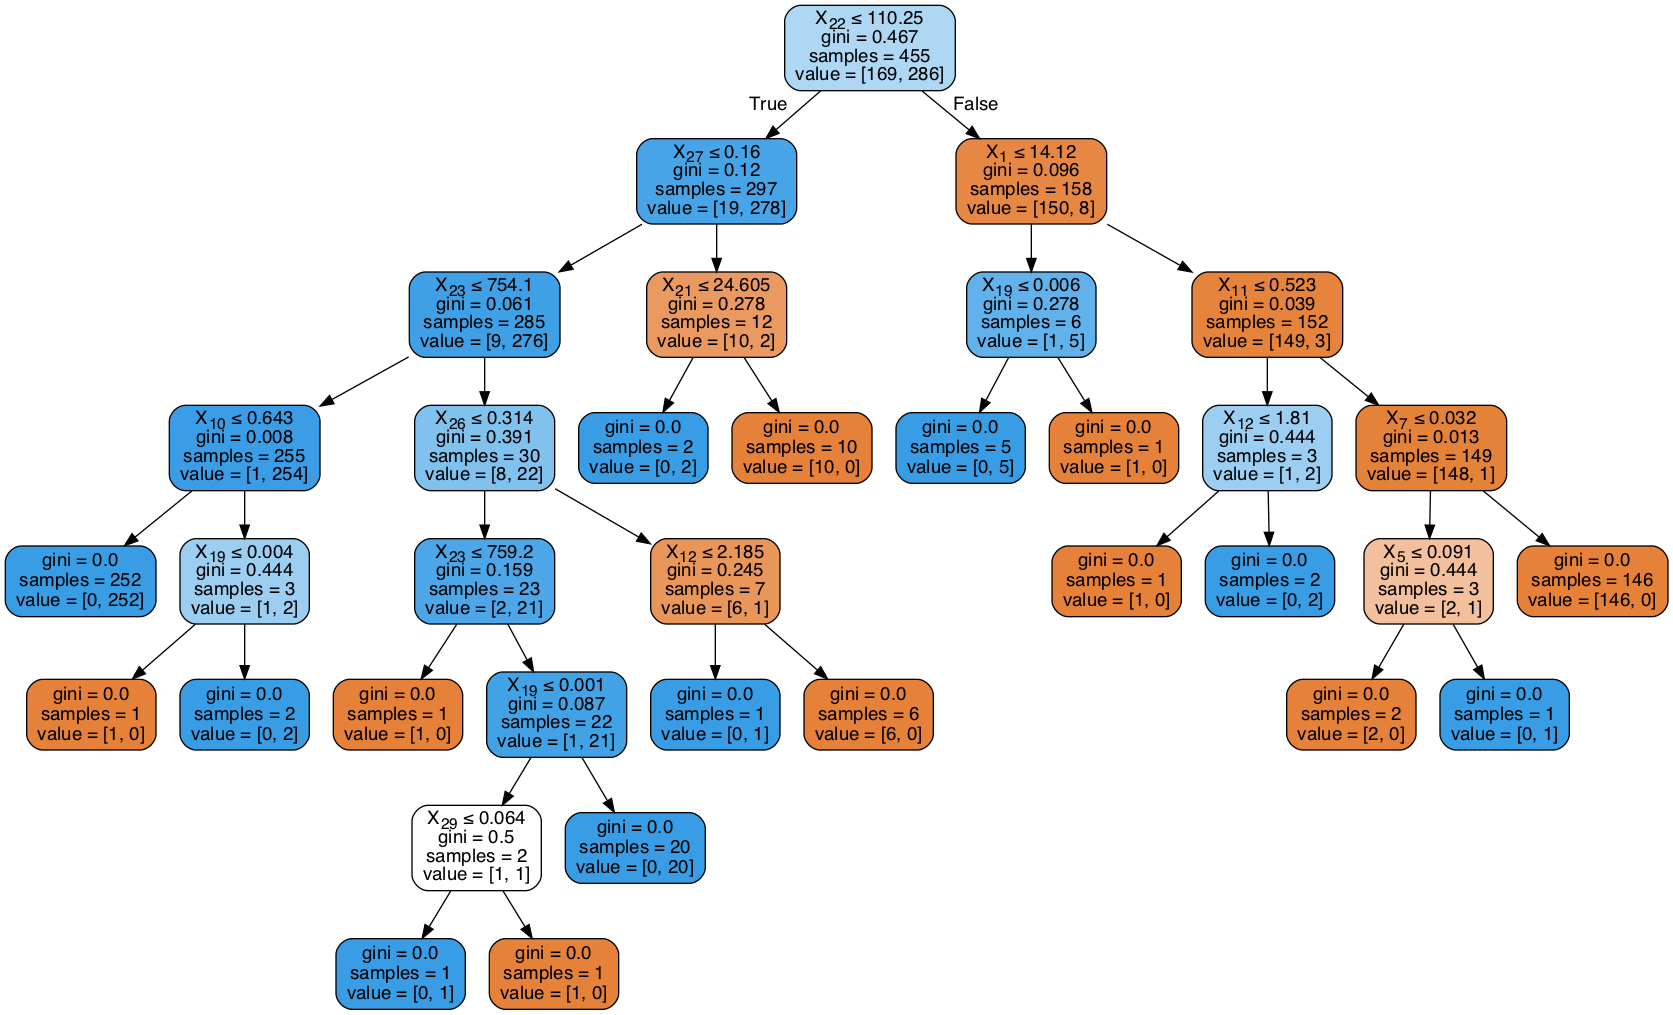

In [22]:
# import the required packages for the visualisation
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# define the plot parameters
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, special_characters=True)

# plot the graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


The decision tree classifier takes an optimisied path through the tree, checking against the important features from the set. It will look to pick characteristics that completely seperate the data in the relevant classifications where possible. The values row at each node details how many objects fall into each classification based on the node. In our breast cancer data set, there are only 2 possible outcomes, so the values are optimised when all of the data points are in one classifiaction and none of them are in the other. The main draw back with decision trees is that they dont generalise well to unseen data as they are fit exactly to the data that they are trained on.

## End